<a href="https://colab.research.google.com/github/isaacyeremia/DatMinFinal/blob/main/UAS_DAMIN_ISAAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import csv
from google.colab import files

# Fungsi untuk mengunduh data saham AAPL dan menyimpannya ke CSV
def download_stock_data():
    try:
        # Mendapatkan data saham AAPL
        stock = yf.Ticker("AAPL")
        hist = stock.history(period="5y")  # Ambil data 5 tahun terakhir

        # Nama file untuk menyimpan data
        filename = "AAPL_stock_data.csv"

        # Menyimpan data ke file CSV
        with open(filename, "w", newline="") as file:
            writer = csv.writer(file)

            # Menulis header sesuai dengan kolom yang tersedia
            writer.writerow(["Date", "Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"])

            # Menulis data historis ke dalam file CSV
            for date, row in hist.iterrows():
                writer.writerow([
                    date.strftime("%Y-%m-%d"),
                    row['Open'],
                    row['High'],
                    row['Low'],
                    row['Close'],
                    row['Volume'],
                    row['Dividends'],
                    row['Stock Splits']
                ])

        print(f"Data saham AAPL berhasil disimpan ke '{filename}'")

        # Mengunduh file ke lokal menggunakan Google Colab
        files.download(filename)
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

# Memanggil fungsi
if __name__ == "__main__":
    download_stock_data()

Data saham AAPL berhasil disimpan ke 'AAPL_stock_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Stock Price Analysis and Modeling
Enter Stock Ticker (e.g., AAPL): NVDA


[*********************100%***********************]  1 of 1 completed


Raw Data
Price        Date      Open      High       Low     Close     Volume
Ticker                 NVDA      NVDA      NVDA      NVDA       NVDA
0      2020-01-02  5.943831  5.972710  5.893293  5.972710  237536000
1      2020-01-03  5.852962  5.920927  5.828066  5.877110  205384000
2      2020-01-06  5.783753  5.906986  5.757612  5.901758  262636000
3      2020-01-07  5.930140  6.019018  5.885079  5.973210  314856000
4      2020-01-08  5.968978  6.025740  5.928896  5.984413  277108000
Exploratory Data Analysis (EDA)
Summary Statistics
Price                            Date        Open        High         Low  \
Ticker                                       NVDA        NVDA        NVDA   
count                             756  756.000000  756.000000  756.000000   
mean    2021-07-01 23:40:57.142856960   15.951500   16.274199   15.606233   
min               2020-01-02 00:00:00    4.984595    5.229714    4.500832   
25%               2020-09-30 18:00:00   12.494213   12.715413   12.12974

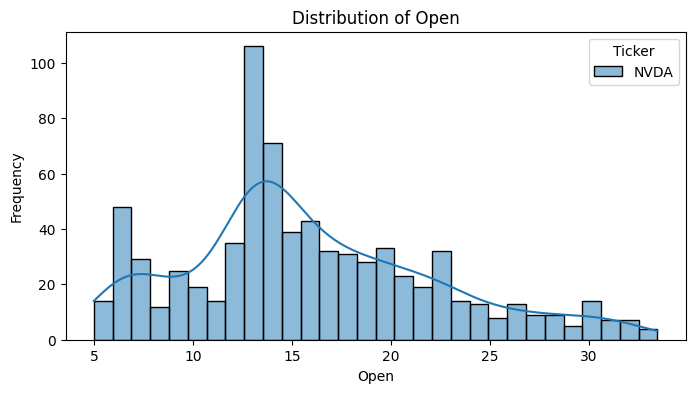

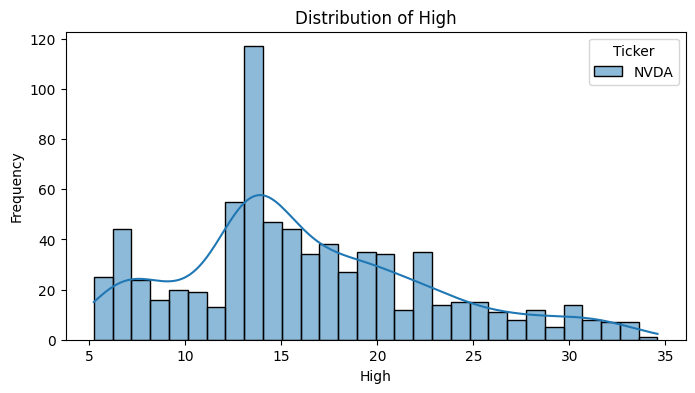

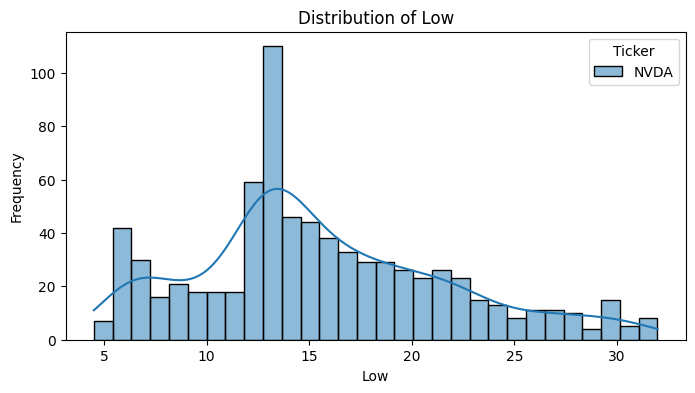

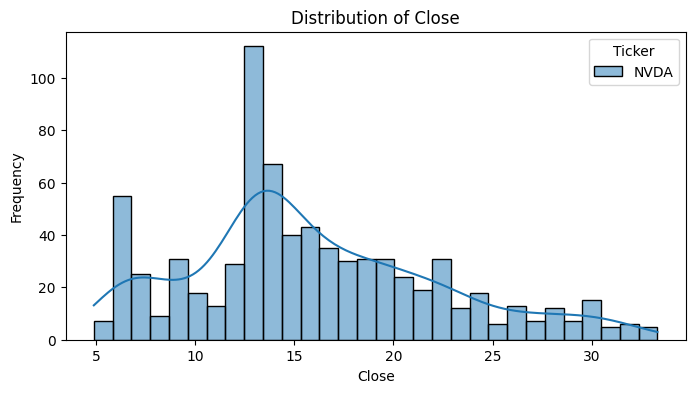

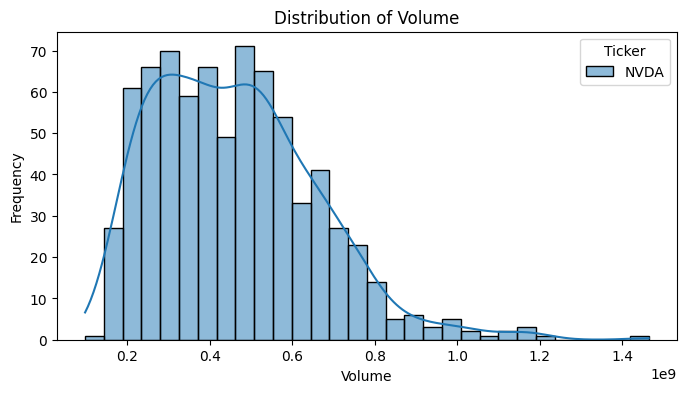

Correlation Matrix


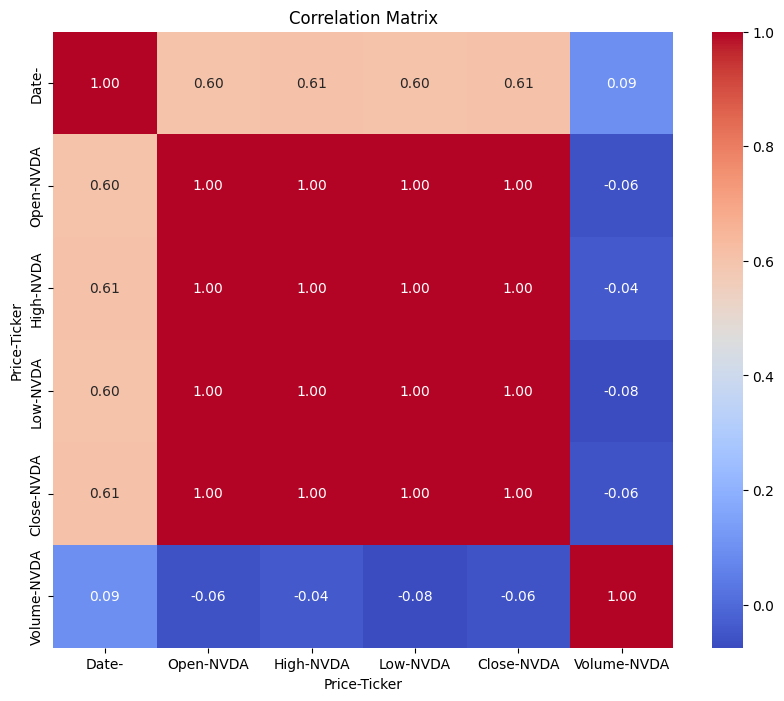

Stock Closing Price Over Time


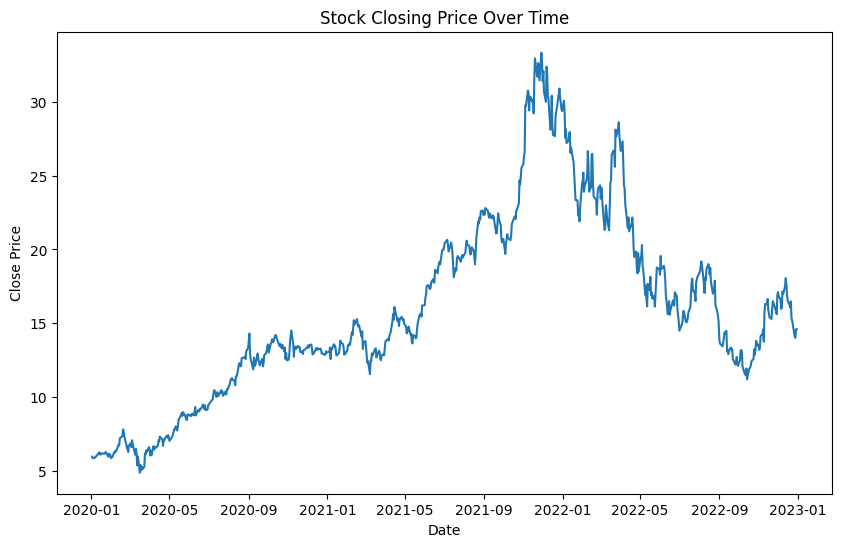

<ipython-input-2-cb775fccf279>:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Daily Return'] = data_cleaned['Close'].pct_change()
<ipython-input-2-cb775fccf279>:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned.dropna(inplace=True)


Dimensionality Reduction with PCA
Explained Variance Ratio: [0.60087788 0.20654458]
PCA Explained Variance Ratio


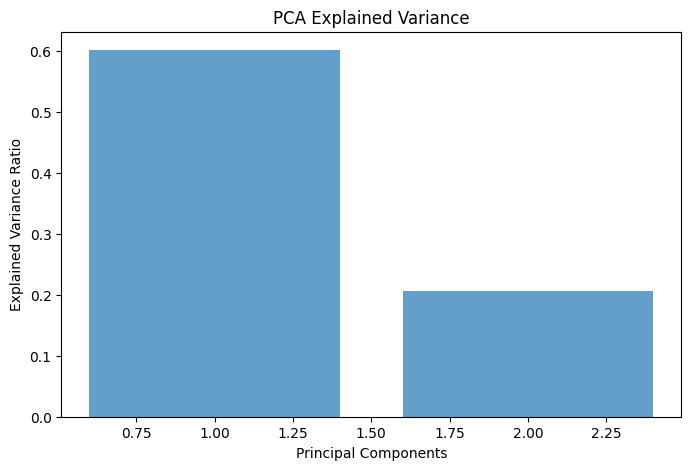

Classification: Random Forest
Classification Report
              precision    recall  f1-score     support
0              0.857143  0.789474  0.821918   76.000000
1              0.802469  0.866667  0.833333   75.000000
accuracy       0.827815  0.827815  0.827815    0.827815
macro avg      0.829806  0.828070  0.827626  151.000000
weighted avg   0.829987  0.827815  0.827588  151.000000
Clustering: KMeans


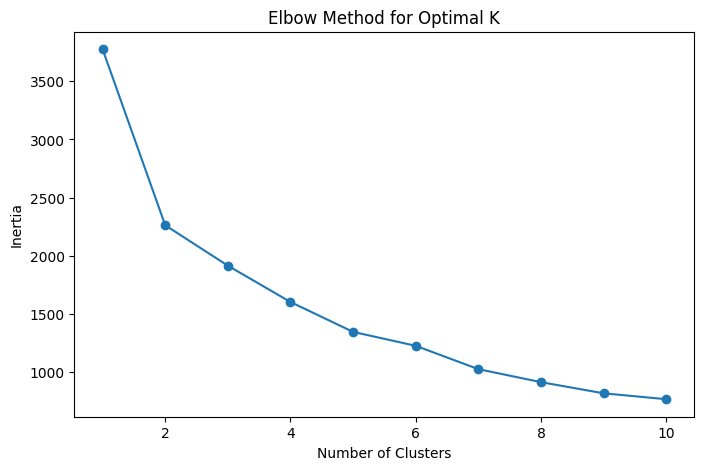

Silhouette Score: 0.38


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, silhouette_score
from sklearn.decomposition import PCA

# Step 1: Load and Clean Data
def load_stock_data(ticker):
    print(f"Downloading stock data for: {ticker}")
    stock_data = yf.download(ticker, start="2020-01-01", end="2023-01-01")
    stock_data.reset_index(inplace=True)
    return stock_data

def clean_data(df):
    df.dropna(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    return df

# Step 2: EDA Functions
def summary_statistics(data_cleaned):
    print("Summary Statistics")
    print(data_cleaned.describe())

def plot_distributions(data_cleaned):
    print("Feature Distributions")
    numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(data_cleaned[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

def plot_correlation_matrix(data_cleaned):
    print("Correlation Matrix")
    correlation = data_cleaned.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

# Step 2: Plotting Functions
def plot_closing_trend(data_cleaned):
    dates = data_cleaned['Date'].values.flatten()
    close_prices = data_cleaned['Close'].values.flatten()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=dates, y=close_prices)
    plt.title('Stock Closing Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()

def plot_elbow_method(X_scaled):
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

def plot_pca_variance(pca):
    print("PCA Explained Variance Ratio")
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('PCA Explained Variance')
    plt.show()

# Step 3: Main Function
def main():
    print("Stock Price Analysis and Modeling")

    # Input ticker symbol
    ticker = input("Enter Stock Ticker (e.g., AAPL): ").strip()

    # Load and clean data
    data = load_stock_data(ticker)
    data_cleaned = clean_data(data)

    # Display raw data
    print("Raw Data")
    print(data_cleaned.head())

    # EDA
    print("Exploratory Data Analysis (EDA)")
    summary_statistics(data_cleaned)
    plot_distributions(data_cleaned)
    plot_correlation_matrix(data_cleaned)

    # Plot closing price trends
    print("Stock Closing Price Over Time")
    plot_closing_trend(data_cleaned)

    # Feature Engineering
    data_cleaned['Daily Return'] = data_cleaned['Close'].pct_change()
    data_cleaned.dropna(inplace=True)

    X = data_cleaned[['Open', 'High', 'Low', 'Volume', 'Daily Return']]
    y = (data_cleaned['Close'] > data_cleaned['Open']).astype(int)  # Binary classification

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA
    print("Dimensionality Reduction with PCA")
    pca = PCA(n_components=2)  # Reduce to 2 dimensions
    X_pca = pca.fit_transform(X_scaled)
    print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
    plot_pca_variance(pca)

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Classification (Random Forest)
    print("Classification: Random Forest")
    clf = RandomForestClassifier(random_state=42)
    param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train.values.ravel())  # Use .values.ravel() to resolve AttributeError
    best_model = grid_search.best_estimator_


    # Classification Results
    y_pred = best_model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    print("Classification Report")
    print(pd.DataFrame(report).transpose())

    # Clustering (KMeans)
    print("Clustering: KMeans")
    plot_elbow_method(X_scaled)

    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_pca)  # Clustering with PCA data
    silhouette_avg = silhouette_score(X_pca, kmeans_labels)  # Evaluate with PCA data
    print(f"Silhouette Score: {silhouette_avg:.2f}")

# Run the app
if __name__ == "__main__":
    main()
